Завдання 1
​
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [1]:
import zipfile
import pandas as pd

merged_data = pd.DataFrame()
data_2d = pd.DataFrame()
mnist_data = pd.DataFrame()

data_folder = 'data.zip'

with zipfile.ZipFile(data_folder, 'r') as z:
    for file_info in z.infolist():
        file_name = file_info.filename
        if file_name.endswith('.csv'):
            with z.open(file_name) as f:
                data = pd.read_csv(f)
                merged_data = pd.concat([merged_data, data], ignore_index=True)
                if 'data_2d' in file_name:
                    data_2d = pd.concat([data_2d, data], ignore_index=True)
                elif 'mnist' in file_name:
                    mnist_data = pd.concat([mnist_data, data], ignore_index=True)

print(merged_data.head())
print(data_2d.head())
print(mnist_data.head())


   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01   7   0  0.1  0.2  0.3  0.4  0.5  ...  0.658  \
0                  2.366961 NaN NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
1                  0.470430 NaN NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2                  1.225400 NaN NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
3                  1.137218 NaN NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
4                  2.694482 NaN NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   

   0.659  0.660  0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

In [2]:
print(data_2d)

     0.000000000000000000e+00  -7.687164597386728637e-01  \
0                         0.0                   2.687848   
1                         0.0                  -0.201379   
2                         0.0                   0.608496   
3                         0.0                  -0.082282   
4                         0.0                   2.083069   
..                        ...                        ...   
194                       1.0                   0.629144   
195                       1.0                  -0.723824   
196                       1.0                   1.346107   
197                       1.0                   3.608219   
198                       1.0                   3.764228   

     4.608603078297135447e-01  
0                    2.366961  
1                    0.470430  
2                    1.225400  
3                    1.137218  
4                    2.694482  
..                        ...  
194                  4.378584  
195                  5.

In [3]:
from sklearn.cluster import KMeans

kmeans_2d = KMeans(n_clusters=3, random_state=42)
kmeans_2d.fit(data_2d)
labels_2d = kmeans_2d.labels_
centroids_2d = kmeans_2d.cluster_centers_

print("Для двовимірного датасету:")
print("Мітки кластерів:", labels_2d)
print("Центроїди кластерів:")
print(centroids_2d)

Для двовимірного датасету:
Мітки кластерів: [0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 2 2 2 0 0 2 2
 0 2 0 0 2 0 2 2 2 2 0 0 2 0 2 2 1 0 0 2 2 0 2 1 0 2 0 2 0 0 2 2 0 2 0 0 2
 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 1 2 0 2 0 0 0 2 2 0 0 0
 2 2 2 0 2 2 2 2 2 0 0 0 2 2]
Центроїди кластерів:
[[0.76119403 1.67572871 3.07345686]
 [0.03529412 0.97950399 0.66278698]
 [0.9787234  3.34072737 3.82087169]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
print(mnist_data)

     7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0    2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1    1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2    0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3    4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4    1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
..  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
494  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
495  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
496  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
497  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
498  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

     0.661  0.662  0.663  0.664  0.665  0.666  0.66

In [5]:
kmeans_mnist = KMeans(n_clusters=10, random_state=42)
kmeans_mnist.fit(mnist_data)
labels_mnist = kmeans_mnist.labels_
centroids_mnist = kmeans_mnist.cluster_centers_

print("Для датасету MNIST:")
print("Мітки кластерів:", labels_mnist)
print("Центроїди кластерів:")
print(centroids_mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Для датасету MNIST:
Мітки кластерів: [1 3 5 9 3 2 6 9 2 5 1 2 5 8 4 9 2 4 6 2 0 0 7 6 5 6 9 5 8 7 8 4 0 2 1 2 8
 1 8 8 2 6 3 8 4 8 3 9 9 3 4 7 4 1 5 9 3 9 3 6 0 6 1 2 6 1 9 7 5 2 5 1 2 8
 2 4 2 3 2 6 0 1 6 7 9 2 4 0 3 4 0 3 7 8 0 8 2 0 9 0 5 7 9 9 9 1 3 6 2 7 3
 8 6 2 2 6 9 2 0 7 0 6 0 2 6 4 7 7 7 0 0 7 2 7 8 5 3 0 2 3 6 4 3 2 8 2 1 5
 3 9 9 2 4 8 7 0 5 4 8 6 0 7 9 0 4 6 3 8 6 6 2 4 4 1 3 8 7 8 7 8 7 3 5 1 6
 1 4 5 8 3 8 5 6 5 3 8 0 6 1 7 0 3 8 3 4 2 4 1 6 9 2 9 8 6 5 4 3 2 3 6 1 0
 2 3 1 7 2 3 2 1 4 7 2 2 6 1 1 9 8 7 7 0 6 3 3 5 3 9 1 6 8 6 4 2 2 1 3 1 5
 2 3 6 2 6 8 7 8 4 5 4 5 8 2 9 9 8 7 1 8 1 2 2 3 9 1 3 9 3 4 9 1 6 1 5 9 5
 5 1 7 3 2 8 3 2 4 1 2 2 4 4 5 5 4 8 9 3 3 5 4 8 2 6 4 4 2 3 5 2 8 8 1 8 4
 4 4 9 2 4 0 3 3 8 4 7 8 7 7 3 6 8 7 4 0 3 3 7 8 6 6 9 0 2 1 7 5 0 4 0 4 6
 1 4 7 7 7 6 8 8 9 4 6 7 2 0 8 0 3 3 2 0 7 0 8 2 7 1 4 9 9 1 7 4 2 1 9 5 5
 4 8 6 2 7 2 6 6 8 2 1 8 3 1 6 1 5 6 2 8 2 4 3 4 6 2 6 2 2 7 2 3 5 5 4 3 1
 3 0 3 7 7 7 7 1 4 9 3 3 7 2 5 2 0 0 0 2 7 2 1 2 7 7 2 0 8 7 9 

Завдання 2
​
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [6]:
print(data_2d)

     0.000000000000000000e+00  -7.687164597386728637e-01  \
0                         0.0                   2.687848   
1                         0.0                  -0.201379   
2                         0.0                   0.608496   
3                         0.0                  -0.082282   
4                         0.0                   2.083069   
..                        ...                        ...   
194                       1.0                   0.629144   
195                       1.0                  -0.723824   
196                       1.0                   1.346107   
197                       1.0                   3.608219   
198                       1.0                   3.764228   

     4.608603078297135447e-01  
0                    2.366961  
1                    0.470430  
2                    1.225400  
3                    1.137218  
4                    2.694482  
..                        ...  
194                  4.378584  
195                  5.

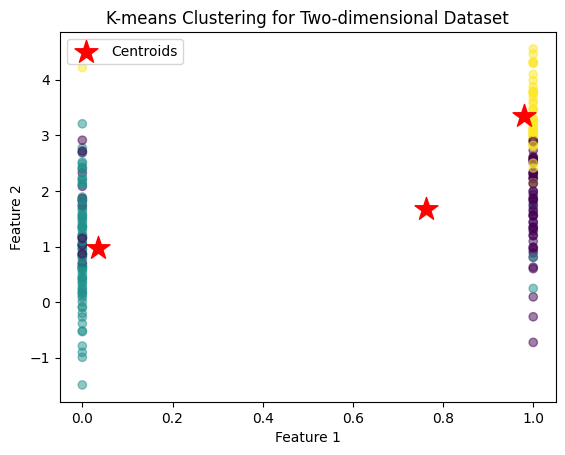

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=labels_2d, cmap='viridis', alpha=0.5)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.title('K-means Clustering for Two-dimensional Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [8]:
print(mnist_data)

     7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0    2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1    1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2    0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3    4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4    1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
..  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
494  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
495  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
496  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
497  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
498  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

     0.661  0.662  0.663  0.664  0.665  0.666  0.66

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


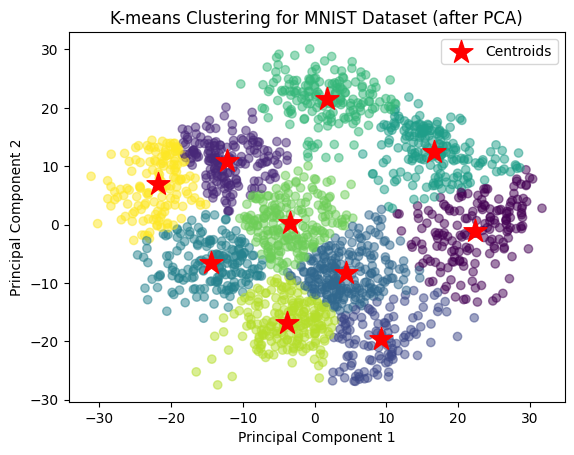

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

mnist_data = load_digits()
X = mnist_data.data

pca = PCA(n_components=2, random_state=42)
X_mnist_reduced = pca.fit_transform(X)

kmeans_mnist = KMeans(n_clusters=10, random_state=42)
kmeans_mnist.fit(X_mnist_reduced)
labels_mnist = kmeans_mnist.labels_
centroids_mnist = kmeans_mnist.cluster_centers_

plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=labels_mnist, cmap='viridis', alpha=0.5)
plt.scatter(centroids_mnist[:, 0], centroids_mnist[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.title('K-means Clustering for MNIST Dataset (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()